# <center>Laboratorium 13<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
from lab12_main import solve_euler
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.linalg import expm
from scipy.integrate import solve_ivp

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

### Funkcja 1:

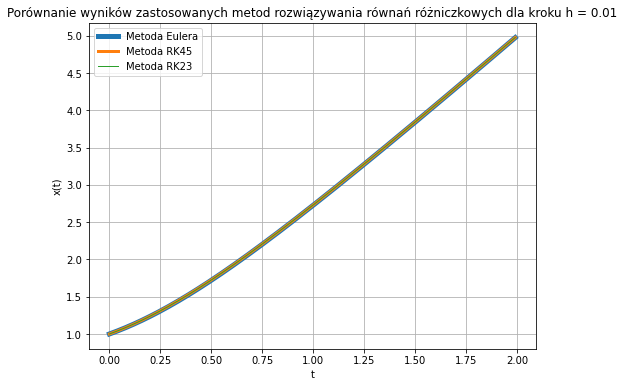

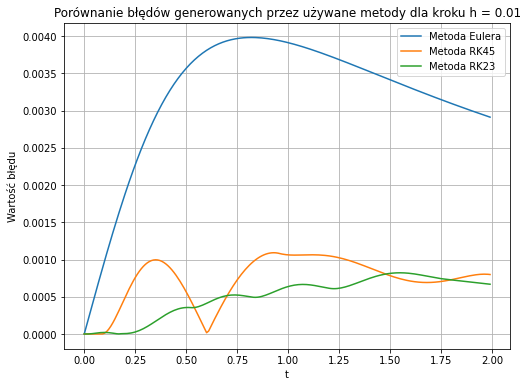

Maksymalny błąd używając metody Eulera:  [0.00398391] (dla h = 0.01)
Maksymalny błąd używając metody RK45:    [0.00109157] (dla h = 0.01)
Maksymalny błąd używając metody RK23:    [0.00082199] (dla h = 0.01) 

Maksymalny błąd używając metody Eulera:  [3.96771331e-05] (dla h = 0.0001)
Maksymalny błąd używając metody RK45:    [0.00109157] (dla h = 0.0001)
Maksymalny błąd używając metody RK23:    [0.00082201] (dla h = 0.0001) 



In [2]:
fun1 = lambda t, x: (x + t) / (x - t)
solution_anal = lambda t: t + np.sqrt(1+2*t**2)

t_span = np.arange(0, 2, 0.01)
t = [t_span[0], t_span[-1]]
x0 = np.array([1])

x_eu = solve_euler(fun1, t_span, x0)
x_45 = solve_ivp(fun1, t, x0, method='RK45', t_eval=t_span)
x_23 = solve_ivp(fun1, t, x0, method='RK23', t_eval=t_span)

plt.figure(figsize=(8, 6))
plt.plot(t_span, x_eu, label='Metoda Eulera', linewidth='5')
plt.plot(x_45.t, x_45.y.T, label='Metoda RK45', linewidth='3')
plt.plot(x_23.t, x_23.y.T, label='Metoda RK23', linewidth='1')
plt.title('Porównanie wyników zastosowanych metod rozwiązywania równań różniczkowych dla kroku h = 0.01')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

error_eu = []
error_45 = []
error_23 = []

for i in range(len(t_span)):
    error_eu.append(np.abs(x_eu[i] - solution_anal(t_span[i])))
    error_45.append(np.abs(x_45.y.T[i] - solution_anal(t_span[i])))
    error_23.append(np.abs(x_23.y.T[i] - solution_anal(t_span[i])))
    
plt.figure(figsize=(8, 6))
plt.plot(t_span, error_eu, label='Metoda Eulera')
plt.plot(t_span, error_45, label='Metoda RK45')
plt.plot(t_span, error_23, label='Metoda RK23')
plt.legend()
plt.title('Porównanie błędów generowanych przez używane metody dla kroku h = 0.01')
plt.xlabel('t')
plt.ylabel('Wartość błędu')
plt.grid()
plt.show()
    
print('Maksymalny błąd używając metody Eulera: ', max(error_eu), '(dla h = 0.01)')
print('Maksymalny błąd używając metody RK45:   ', max(error_45), '(dla h = 0.01)')
print('Maksymalny błąd używając metody RK23:   ', max(error_23), '(dla h = 0.01)', '\n')

# ----- jeszcze raz przypisuję te same zmienne przy zmienionym kroku -----

error_eu = []  
error_45 = []
error_23 = []
t_span = np.arange(0, 2, 0.0001)
t = [t_span[0], t_span[-1]]
x0 = np.array([1])

x_eu = solve_euler(fun1, t_span, x0)
x_45 = solve_ivp(fun1, t, x0, method='RK45', t_eval=t_span)
x_23 = solve_ivp(fun1, t, x0, method='RK23', t_eval=t_span)
for i in range(len(t_span)):
    error_eu.append(np.abs(x_eu[i] - solution_anal(t_span[i])))
    error_45.append(np.abs(x_45.y.T[i] - solution_anal(t_span[i])))
    error_23.append(np.abs(x_23.y.T[i] - solution_anal(t_span[i])))
print('Maksymalny błąd używając metody Eulera: ', max(error_eu), '(dla h = 0.0001)')
print('Maksymalny błąd używając metody RK45:   ', max(error_45), '(dla h = 0.0001)')
print('Maksymalny błąd używając metody RK23:   ', max(error_23), '(dla h = 0.0001)', '\n')

##### Komentarz:
Jak widać z powyższych wykresów oraz porównania rzędu generowanych maksymalnych błędów dla różnych kroków, metoda Eulera staje się tak samo dokładna jak metody Rungego-Kutty dla kroku h ~ 0.01, dla mniejszych kroków jest dokładniejsza, natomiast dla większych kroków przewagę zyskują solvery RK. Również można zauważyć ciekawą rzecz, że wcale wyższy rząd w metodzie RK nie gwarantuje lepszego rozwiązania - dla powyższej funkcji najbardziej dokładną metodą okazał się solver RK23. Mimo znaczącego zmniejszenia kroku błędy generowane przez solvery RK nie zmieniły się znacząco (są tego samego rzędu).

### Funkcja 2:

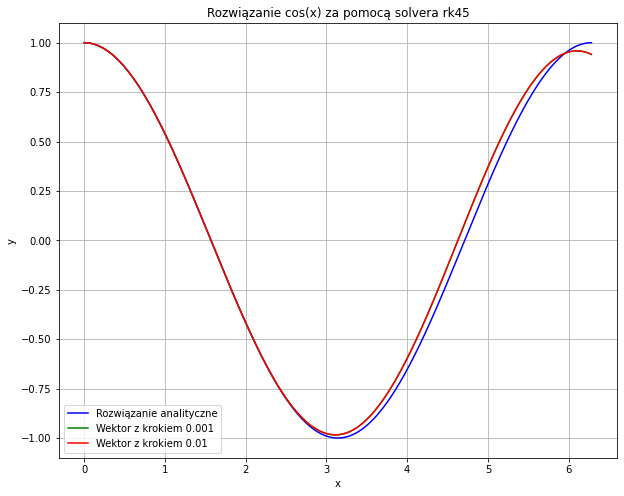

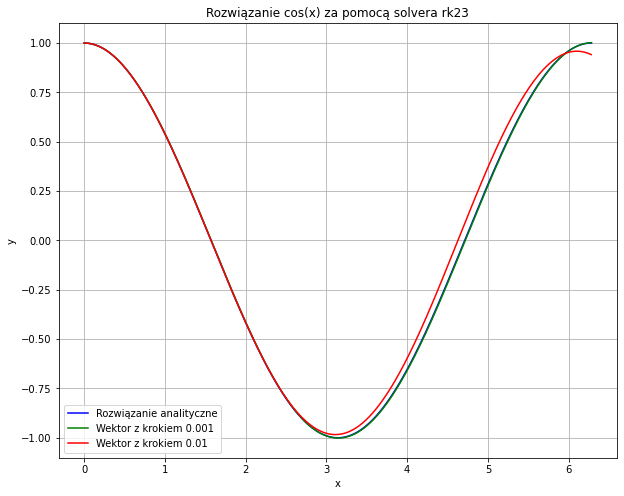

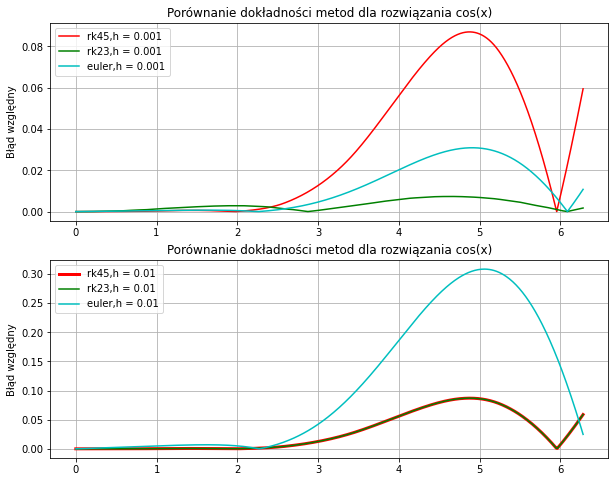

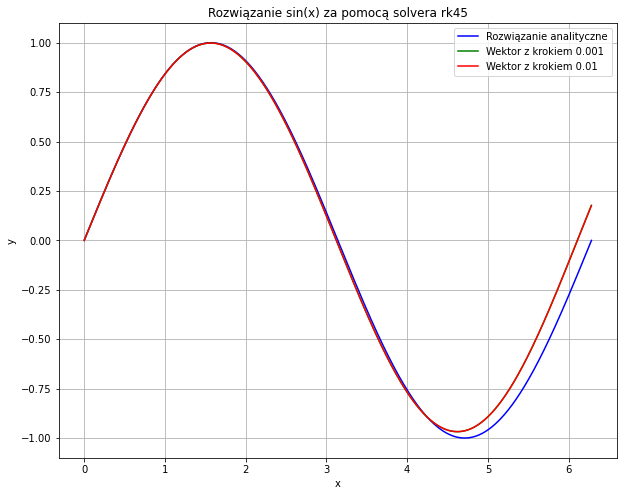

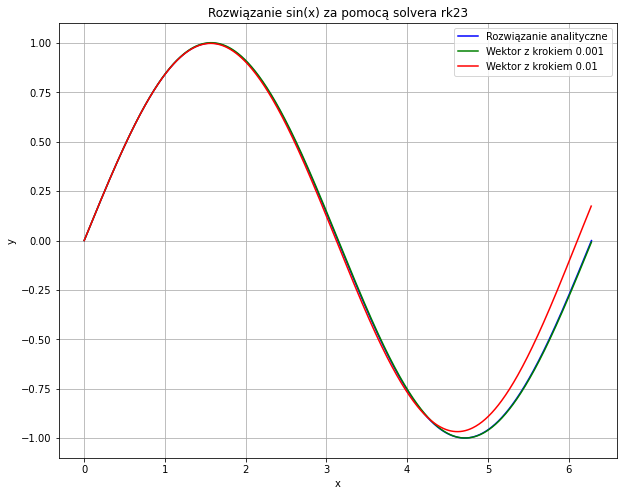

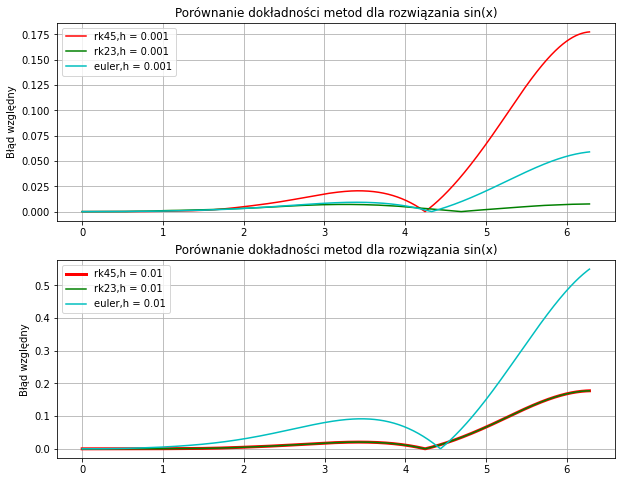

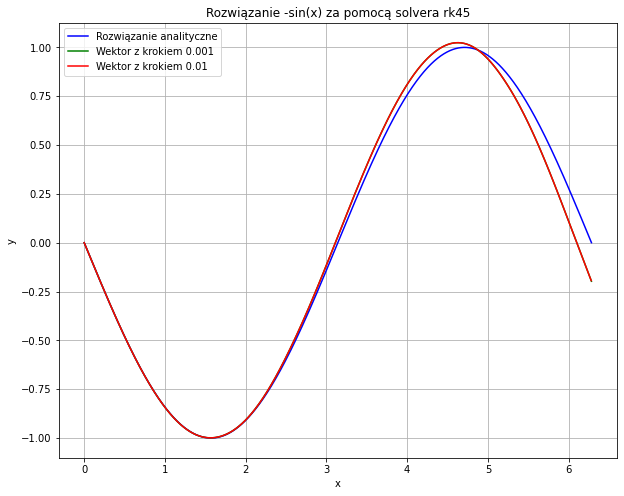

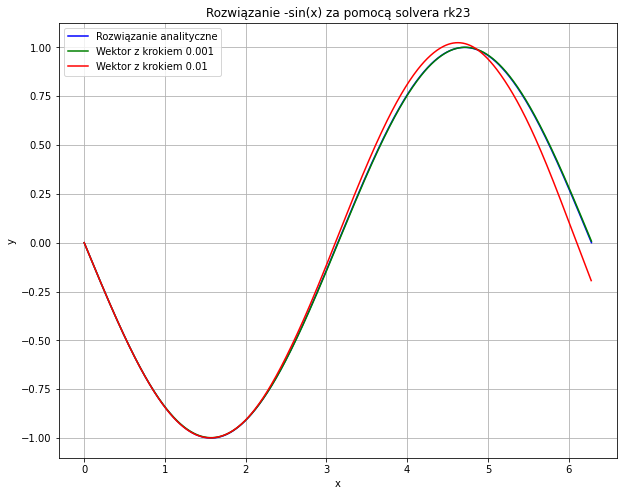

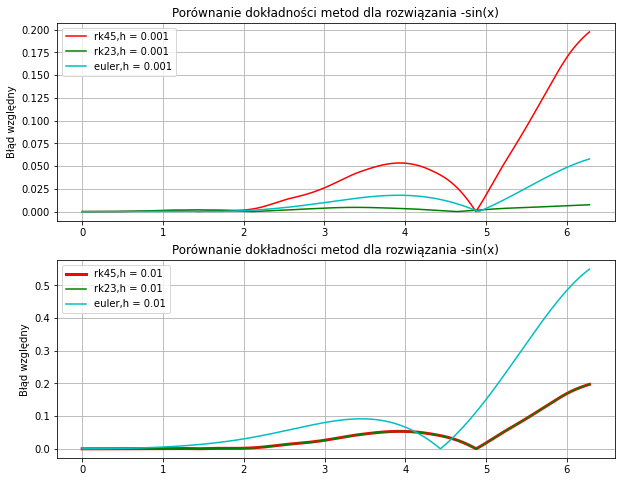

In [3]:
def fun_2(t,y):
    yr = np.ones((4,))
    yr[0] = y[2]
    yr[1] = y[3]
    yr[2] = -(y[0])/(y[0]**2 + y[1]**2)**1.5
    yr[3] = -(y[1])/(y[0]**2 + y[1]**2)**1.5
    return yr


t_span = np.arange(0,2*np.pi,0.001)
t_span2 = np.arange(0,2*np.pi,0.01)
x0 = np.array([1, 0, 0, 1])
x = solve_euler(fun_2, t_span, x0)
x2 = solve_euler(fun_2, t_span2, x0)

err1 = []
err2 = []
err3 = []
err1_2 = []
err2_2 = []
err3_2 = []

for index,value in enumerate(x[:,0]):
    err1.append(np.abs(value - np.cos(t_span[index])))

for index,value in enumerate(x[:,1]):
    err2.append(np.abs(value - np.sin(t_span[index])))

for index,value in enumerate(x[:,2]):
    err3.append(np.abs(value + np.sin(t_span[index])))

for index,value in enumerate(x2[:,0]):
    err1_2.append(np.abs(value - np.cos(t_span2[index])))

for index,value in enumerate(x2[:,1]):
    err2_2.append(np.abs(value - np.sin(t_span2[index])))

for index,value in enumerate(x2[:,2]):
    err3_2.append(np.abs(value + np.sin(t_span2[index])))

    
    
 
result1_rk45 = solve_ivp(fun_2, (0,2*np.pi), x0, method="RK45",t_eval = t_span)
result2_rk45 = solve_ivp(fun_2, (0,2*np.pi), x0, method="RK45",t_eval = t_span2)

result1_rk23 = solve_ivp(fun_2, (0,2*np.pi), x0,  method="RK23",t_eval = t_span)
result2_rk23 = solve_ivp(fun_2, (0,2*np.pi), x0,  method="RK45",t_eval = t_span2)

#dla pierwszego wektora
err_rk45_1 = []
err_rk45_2= []
err_rk45_3 = []
err_rk23_1 = []
err_rk23_2 = []
err_rk23_3 = []
#dla drugiego wektora
err_rk45_1_2 = []
err_rk45_2_2= []
err_rk45_3_2 = []
err_rk23_1_2 = []
err_rk23_2_2 = []
err_rk23_3_2 = []

for index,value in enumerate(result1_rk45.y[0]):
    err_rk45_1.append(np.abs(value - np.cos(t_span[index])))

for index,value in enumerate(result1_rk45.y[1]):
    err_rk45_2.append(np.abs(value - np.sin(t_span[index])))

for index,value in enumerate(result1_rk45.y[2]):
    err_rk45_3.append(np.abs(value + np.sin(t_span[index])))

for index,value in enumerate(result1_rk23.y[0]):
    err_rk23_1.append(np.abs(value - np.cos(t_span[index])))

for index,value in enumerate(result1_rk23.y[1]):
    err_rk23_2.append(np.abs(value - np.sin(t_span[index])))

for index,value in enumerate(result1_rk23.y[2]):
    err_rk23_3.append(np.abs(value + np.sin(t_span[index])))



    
for index,value in enumerate(result2_rk45.y[0]):
    err_rk45_1_2.append(np.abs(value - np.cos(t_span2[index])))

for index,value in enumerate(result2_rk45.y[1]):
    err_rk45_2_2.append(np.abs(value - np.sin(t_span2[index])))

for index,value in enumerate(result2_rk45.y[2]):
    err_rk45_3_2.append(np.abs(value + np.sin(t_span2[index])))

for index,value in enumerate(result2_rk23.y[0]):
    err_rk23_1_2.append(np.abs(value - np.cos(t_span2[index])))

for index,value in enumerate(result2_rk23.y[1]):
    err_rk23_2_2.append(np.abs(value - np.sin(t_span2[index])))

for index,value in enumerate(result2_rk23.y[2]):
    err_rk23_3_2.append(np.abs(value + np.sin(t_span2[index])))


#cos(x)    
plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,np.cos(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk45.t,result1_rk45.y[0],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk45.t,result2_rk45.y[0],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie cos(x) za pomocą solvera rk45')

plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,np.cos(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk23.t,result1_rk23.y[0],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk23.t,result2_rk23.y[0],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie cos(x) za pomocą solvera rk23')

plt.figure(figsize = [10,8])
plt.subplot(2,1,1)
plt.plot(t_span,err_rk45_1,'r',label = 'rk45,h = 0.001')
plt.plot(t_span,err_rk23_1,'g',label = 'rk23,h = 0.001')
plt.plot(t_span,err1 ,'c',label = 'euler,h = 0.001')
plt.title('Porównanie dokładności metod dla rozwiązania cos(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t_span2,err_rk45_1_2,'r',label = 'rk45,h = 0.01', linewidth=3)
plt.plot(t_span2,err_rk23_1_2,'g',label = 'rk23,h = 0.01')
plt.plot(t_span2,err1_2 ,'c',label = 'euler,h = 0.01')
plt.title('Porównanie dokładności metod dla rozwiązania cos(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()



#sin(x)

plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,np.sin(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk45.t,result1_rk45.y[1],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk45.t,result2_rk45.y[1],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie sin(x) za pomocą solvera rk45')

plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,np.sin(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk23.t,result1_rk23.y[1],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk23.t,result2_rk23.y[1],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie sin(x) za pomocą solvera rk23')

plt.figure(figsize = [10,8])
plt.subplot(2,1,1)
plt.plot(t_span,err_rk45_2,'r',label = 'rk45,h = 0.001')
plt.plot(t_span,err_rk23_2,'g',label = 'rk23,h = 0.001')
plt.plot(t_span,err2 ,'c',label = 'euler,h = 0.001')
plt.title('Porównanie dokładności metod dla rozwiązania sin(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t_span2,err_rk45_2_2,'r',label = 'rk45,h = 0.01', linewidth=3)
plt.plot(t_span2,err_rk23_2_2,'g',label = 'rk23,h = 0.01')
plt.plot(t_span2,err2_2 ,'c',label = 'euler,h = 0.01')
plt.title('Porównanie dokładności metod dla rozwiązania sin(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()


# -sin(x)


plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,-1*np.sin(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk45.t,result1_rk45.y[2],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk45.t,result2_rk45.y[2],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie -sin(x) za pomocą solvera rk45')

plt.figure(figsize = [10,8])
plt.grid()
plt.plot(t_span,-1*np.sin(t_span),'b',label = 'Rozwiązanie analityczne')
plt.plot(result1_rk23.t,result1_rk23.y[2],'g',label='Wektor z krokiem 0.001')
plt.plot(result2_rk23.t,result2_rk23.y[2],'r',label='Wektor z krokiem 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Rozwiązanie -sin(x) za pomocą solvera rk23')

plt.figure(figsize = [10,8])
plt.subplot(2,1,1)
plt.plot(t_span,err_rk45_3,'r',label = 'rk45,h = 0.001')
plt.plot(t_span,err_rk23_3,'g',label = 'rk23,h = 0.001')
plt.plot(t_span,err3 ,'c',label = 'euler,h = 0.001')
plt.title('Porównanie dokładności metod dla rozwiązania -sin(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t_span2,err_rk45_3_2,'r',label = 'rk45,h = 0.01', linewidth=3)
plt.plot(t_span2,err_rk23_3_2,'g',label = 'rk23,h = 0.01')
plt.plot(t_span2,err2_2 ,'c',label = 'euler,h = 0.01')
plt.title('Porównanie dokładności metod dla rozwiązania -sin(x)')
plt.legend()
plt.ylabel('Błąd względny')
plt.grid()

##### Komentarz:
Z wszystkich funkcji,najlepiej sprawuje się metoda rk23 z zmiennym krokiem i wydaje się ona być najoptymalniejszym rozwiązaniem. Zaimplementowana przeze mnie metoda Eulera w zależności od liczby elementów wektora daje lepszy lub gorszy wynik niż solver rk45.Nie porównywałem czasu wykonywania tych funkcji, ponieważ nie optymalizowałem mojej metody , przez co wyniki pomiarów nie były by wiarygodne.

### Funkcja 3:

Krok h = 0.001


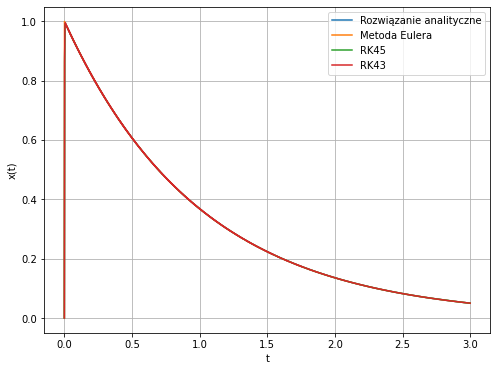

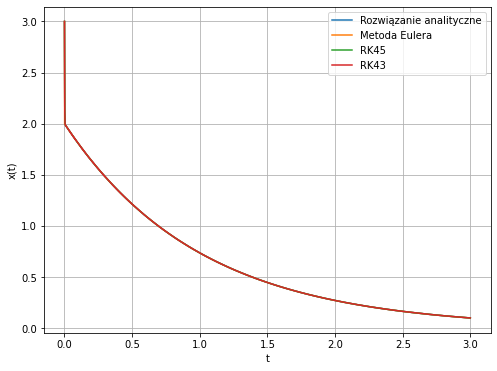

In [4]:
A = np.array([[-667, 333], [666, -334]])
f = lambda t, x: A @ x

t_span = np.arange(0, 3, 0.001) 
print('Krok h = 0.001')
x0 = np.array([0, 3])
x = solve_euler(f, t_span, x0)


x_an = []
for t in t_span:
    x_an.append(expm(A * t) @ x0)
x_an = np.array(x_an)



x0 = np.array([0, 3]).T
resRK45 = solve_ivp(f, (0, 3), x0, method="RK45",t_eval = t_span)
resRK23 = solve_ivp(f, (0, 3), x0, method="RK23",t_eval = t_span)

plt.figure(figsize=(8,6))
plt.plot(t_span, x_an[:,0], t_span, x[:,0],resRK45.t, resRK45.y[0],resRK23.t, resRK23.y[0])
plt.legend(['Rozwiązanie analityczne', 'Metoda Eulera','RK45','RK43'])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()



plt.figure(figsize=(8,6))
plt.plot(t_span, x_an[:,1], t_span, x[:,1],resRK45.t, resRK45.y[1],resRK23.t, resRK23.y[1])
plt.legend(['Rozwiązanie analityczne', 'Metoda Eulera','RK45','RK43'])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

##### Komentarz:
Na pierwszy rzut oka wydaje się,że wykresy przedstawiają jedną funkcję,jednak tak na prawdę wykresy nakładają się na siebie przez co odnosimy wrażenie,że widzimy jeden wykres.

Text(0.5, 1.0, 'Dokładność solvera RK23 dla x2(t)')

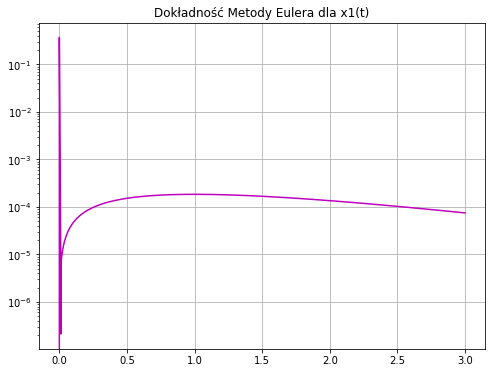

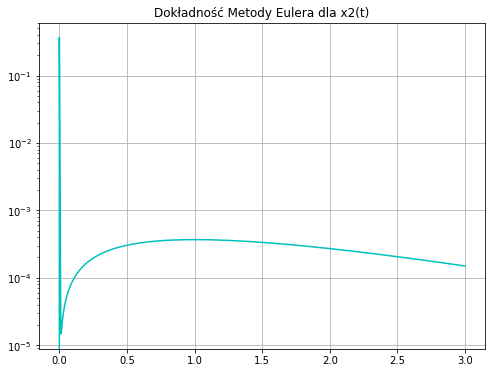

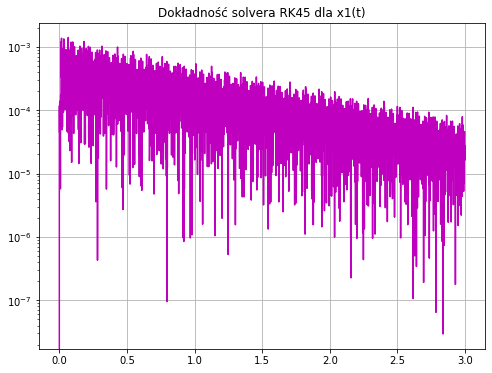

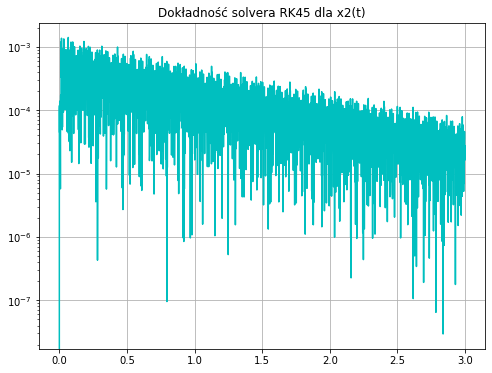

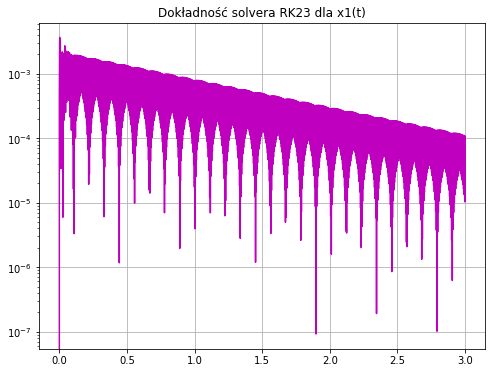

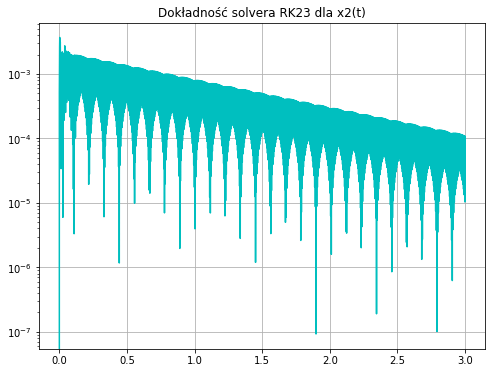

In [5]:
err_eu_x1 = []
err_eu_x2 = []
err_rk45_x1 = []
err_rk45_x2 = []
err_rk23_x1 = []
err_rk23_x2 = []

for index,value in enumerate(x[:,0]):
    err_eu_x1.append(np.abs(value - x_an[index,0]))

for index,value in enumerate(x[:,1]):
    err_eu_x2.append(np.abs(value - x_an[index,1]))

for index,value in enumerate(resRK45.y[0]):
    err_rk45_x1.append(np.abs(value - x_an[index,0]))

for index,value in enumerate(resRK45.y[1]):
    err_rk45_x2.append(np.abs(value - x_an[index,1]))

for index,value in enumerate(resRK23.y[0]):
    err_rk23_x1.append(np.abs(value - x_an[index,0]))

for index,value in enumerate(resRK23.y[1]):
    err_rk23_x2.append(np.abs(value - x_an[index,1]))
    
    


plt.figure(figsize=(8,6))
plt.plot(t_span,err_eu_x1,'m')
plt.yscale('log')
plt.grid()
plt.title('Dokładność Metody Eulera dla x1(t)')
                     
plt.figure(figsize=(8,6))
plt.plot(t_span,err_eu_x2,'c')
plt.yscale('log')
plt.title('Dokładność Metody Eulera dla x2(t)')
plt.grid()


plt.figure(figsize=(8,6))
plt.plot(t_span,err_rk45_x1,'m')
plt.yscale('log')
plt.grid()
plt.title('Dokładność solvera RK45 dla x1(t)')


plt.figure(figsize=(8,6))
plt.plot(t_span,err_rk45_x2,'c')
plt.yscale('log')
plt.grid()
plt.title('Dokładność solvera RK45 dla x2(t)')
                     
    
plt.figure(figsize=(8,6))
plt.plot(t_span,err_rk23_x1,'m')
plt.yscale('log')
plt.grid()
plt.title('Dokładność solvera RK23 dla x1(t)')
                     
    
plt.figure(figsize=(8,6))
plt.plot(t_span,err_rk23_x2,'c')
plt.yscale('log')
plt.grid()
plt.title('Dokładność solvera RK23 dla x2(t)')

##### Komentarz:
Z racji tego, że dla rozwiązania RK45 i RK23 punkty rozmieszczone blisko siebie osiągają względnie skrajne wartości,wykres staje się mało czytelny, jednak możemy też zauważyć zależność, mianowicie wraz z wzrostem argumentów dostajemy dokładniejsze rozwiązanie.W każdym przypadku największy błąd otrzymujemy na początku rozwiązania.Wynika to z faktu, że początkowo nasza funkcja jest praktycznie pionowa a co za tym idzie pochodna dąży do + nieskończoności i generuje to błędy w naszych metodach.

### Funkcja 4: (orbita Arenstorffa)

Porównanie rozwiązań używanych metod  dla orbity Arenstorfa


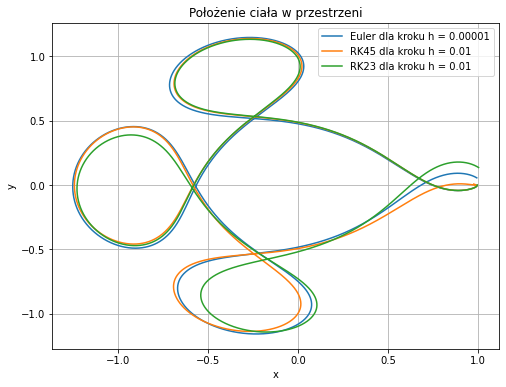

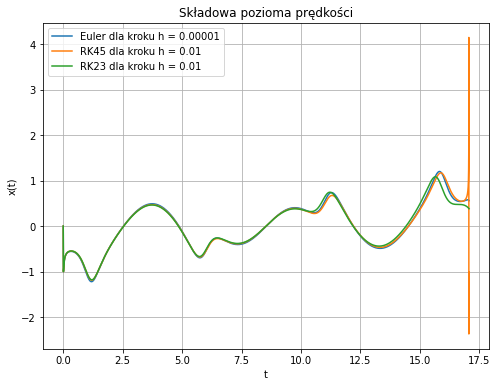

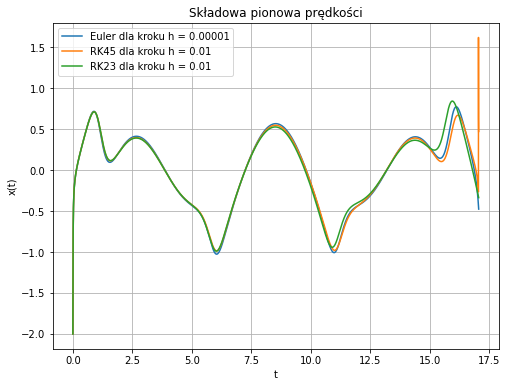

In [7]:
def fun(t, x):
    h = 0.012277471
    h_ = 1 - h
    D_1 = ((x[0] + h) ** 2 + x[2] ** 2) ** (3/2)
    D_2 = ((x[0] - h_) ** 2 + x[2] ** 2) ** (3/2)
    dx1 = x[1]
    dx2 = x[0] + 2 * x[3] - h_ * ((x[0] + h)/D_1) - h * ((x[0] - h_)/D_2)
    dx3 = x[3]
    dx4 = x[2] - 2 * x[1] - h_ * (x[2]/D_1) - h * (x[2]/D_2)
    
    return np.array([dx1, dx2, dx3, dx4])

T = 17.0652165601579625588917206249

t_span_eu = np.arange(0, T, 0.00001)   # krok dla eulera
t_eu = [t_span_eu[0], t_span_eu[-1]]

t_span_rk = np.arange(0, T, 0.001)   # krok dla RK45/RK23
t_rk = [t_span_rk[0], t_span_rk[-1]]

x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
x_eu = solve_euler(fun,t_span_eu, x0)
x_45 = solve_ivp(fun, t_rk, x0, method='RK45', t_eval=t_span_rk)
x_23 = solve_ivp(fun, t_rk, x0, method='RK23', t_eval=t_span_rk)

print('Porównanie rozwiązań używanych metod  dla orbity Arenstorfa')

plt.figure(figsize=(8,6))
plt.plot(x_eu[:, 0], x_eu[:, 2], label='Euler dla kroku h = 0.00001')
plt.plot(x_45.y.T[:, 0], x_45.y.T[:, 2], label='RK45 dla kroku h = 0.01')
plt.plot(x_23.y.T[:, 0], x_23.y.T[:, 2], label='RK23 dla kroku h = 0.01')
plt.title('Położenie ciała w przestrzeni')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(t_span_eu, x_eu[:,1], label='Euler dla kroku h = 0.00001')
plt.plot(x_45.t, x_45.y.T[:, 1], label='RK45 dla kroku h = 0.01')
plt.plot(x_23.t, x_23.y.T[:, 1], label='RK23 dla kroku h = 0.01')
plt.title('Składowa pozioma prędkości')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(t_span_eu, x_eu[:,3], label='Euler dla kroku h = 0.00001')
plt.plot(x_45.t, x_45.y.T[:, 3], label='RK45 dla kroku h = 0.01')
plt.plot(x_23.t, x_23.y.T[:, 3], label='RK23 dla kroku h = 0.01')
plt.title('Składowa pionowa prędkości')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

##### Komentarz:
Jak można zauważyc z powyższych wykresów potwierdza się to co mogliśmy zauważyć wcześniej - żeby metoda Eulera mogła "konkurować" z solverami RK potrzebuje dużo mniejszego kroku. W tym przypadku nie umiem rozsądzić, który solver lepiej przybliżył rozwiązanie rzeczywiste, gdyż przy tym samym kroku metoda RK23 znacząco niedomknęła orbity, natomiast metoda RK45 za bardzo spłaszczyła lewą pętlę orbity oraz przy składowych prędkości na końcach przedziałów wygenerowała duże błędy w postaci skoków wartości.

## Wnioski:
##### Proszę potraktować komentarze do każdego zadania jako wnioski pisane na bieżąco.


**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
